In [2]:
#All neccessary imports of course
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Start with logitsics dataset,
#Main goal of logistics dataset is to predict future demands (daily_demand, total_orders_last_month, last_restock_date, and category)
#calculate the most efficient pick-paths for employees (item_popularity_score, storage_location_id, zone, and picking_time_seconds)
#monitor inventory health and build anomaly detection models  (stock_level, reorder_point, stockout_count_last_month, and order_fulfillment_rate)

#read first 5
logistics_df = pd.read_csv("https://raw.githubusercontent.com/VUT-BA-3-2-Project-2025/Team-force/main/logistics_dataset.csv")
logistics_df.head()

,item_id,category,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,storage_location_id,...,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,last_restock_date,forecasted_demand_next_7d,KPI_score
0,ITM10000,Pharma,283,21,4,4,49.85,1.56,0.43,L82,...,117.80,1.14,0,0.80,700,3.33,0.33,2024-02-17,184.37,0.556
1,ITM10001,Automotive,301,52,9,6,23.34,2.55,0.69,L15,...,178.80,1.09,3,0.79,736,10.36,0.98,2024-10-01,221.94,0.723
2,ITM10002,Groceries,132,60,11,8,37.69,3.15,0.62,L4,...,54.05,0.95,7,0.75,814,14.32,0.87,2024-04-07,53.85,0.680
3,ITM10003,Automotive,346,46,13,5,33.69,2.79,0.21,L95,...,31.10,1.90,0,0.96,994,2.08,0.29,2024-01-27,92.04,0.488
4,ITM10004,Automotive,49,55,4,6,49.58,5.23,0.31,L36,...,104.97,0.63,5,0.83,299,5.65,0.96,2024-05-17,194.58,0.670


In [5]:
#read the last 5
logistics_df.tail()

,item_id,category,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,storage_location_id,...,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,last_restock_date,forecasted_demand_next_7d,KPI_score
3199,ITM13199,Groceries,343,21,12,2,39.88,1.30,0.34,L43,...,24.63,1.50,3,0.79,87,11.80,0.20,2024-11-28,237.04,0.545
3200,ITM13200,Electronics,428,43,5,7,2.68,4.25,0.91,L83,...,79.04,1.46,4,0.77,833,14.96,0.39,2024-11-28,34.00,0.605
3201,ITM13201,Groceries,415,80,14,5,49.15,5.41,0.14,L11,...,199.89,1.11,9,0.89,937,7.63,0.60,2024-10-02,62.57,0.509
3202,ITM13202,Groceries,173,84,3,9,43.39,8.47,0.69,L58,...,65.45,1.04,4,0.86,905,6.37,0.46,2024-03-30,36.96,0.565
3203,ITM13203,Apparel,377,40,14,3,29.40,7.43,0.14,L48,...,39.88,1.94,9,0.92,812,8.74,0.54,2024-05-25,193.91,0.435


In [6]:
#get summary info of dataset
logistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price                 3204 non-null   float

In [7]:
logistics_df.describe()

,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,picking_time_seconds,handling_cost_per_unit,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,forecasted_demand_next_7d,KPI_score
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,263.491573,54.759363,8.507803,5.578340,25.435868,5.260078,0.542325,95.606429,2.777116,105.887575,1.045993,4.602372,0.849738,521.714732,8.123677,0.600581,154.286245,0.601737
std,138.568360,26.053354,3.473229,2.292486,14.038861,2.725639,0.259200,49.218084,1.305213,54.428161,0.550480,2.883708,0.086703,276.768531,4.069191,0.230511,82.945255,0.108286
min,20.000000,10.000000,3.000000,2.000000,1.010000,0.500000,0.100000,10.000000,0.500000,10.220000,0.100000,0.000000,0.700000,50.000000,1.000000,0.200000,10.090000,0.259000
25%,144.000000,32.000000,5.000000,4.000000,13.535000,2.917500,0.310000,53.000000,1.660000,59.760000,0.580000,2.000000,0.780000,283.000000,4.590000,0.400000,83.190000,0.527000
50%,264.000000,55.000000,9.000000,6.000000,25.405000,5.235000,0.540000,96.000000,2.810000,106.005000,1.050000,5.000000,0.850000,513.500000,8.150000,0.600000,152.870000,0.601000
75%,386.000000,78.000000,12.000000,8.000000,37.412500,7.542500,0.760000,138.000000,3.910000,152.410000,1.522500,7.000000,0.920000,764.250000,11.692500,0.800000,225.440000,0.677250
max,499.000000,99.000000,14.000000,9.000000,49.980000,10.000000,1.000000,179.000000,5.000000,200.000000,2.000000,9.000000,1.000000,999.000000,15.000000,1.000000,299.940000,0.936000


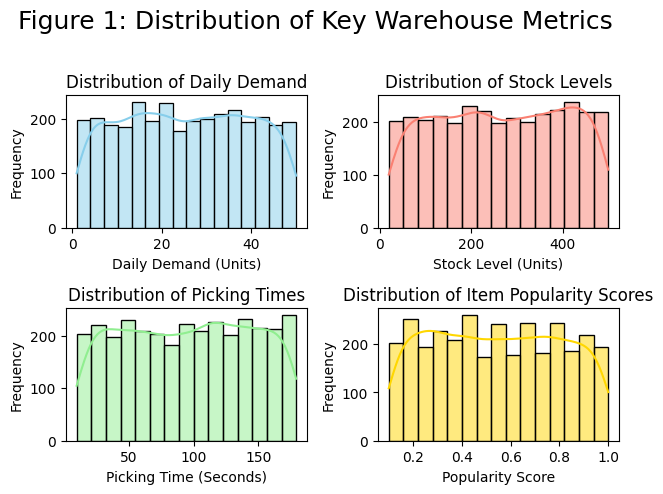

In [8]:
#Understand data distribution for each feature
plt.subplot(2, 2, 1)
sns.histplot(logistics_df['daily_demand'], kde=True, color='skyblue')
plt.title('Distribution of Daily Demand')
plt.xlabel('Daily Demand (Units)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(logistics_df['stock_level'], kde=True, color='salmon')
plt.title('Distribution of Stock Levels')
plt.xlabel('Stock Level (Units)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(logistics_df['picking_time_seconds'], kde=True, color='lightgreen')
plt.title('Distribution of Picking Times')
plt.xlabel('Picking Time (Seconds)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(logistics_df['item_popularity_score'], kde=True, color='gold')
plt.title('Distribution of Item Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')

plt.suptitle('Figure 1: Distribution of Key Warehouse Metrics', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()